# Lab 6: Confidence Intervals 

### Problem 1
The first problem is to look at your background distribution and determine where the 5𝜎 sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.] <br>
<br>
We will first generate a simulated LHC Poisson background distribution with mean as 100. Then we will determine where the 5-sigma sensitivity threshold is. 

In [138]:
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams["figure.figsize"] = (15,10)

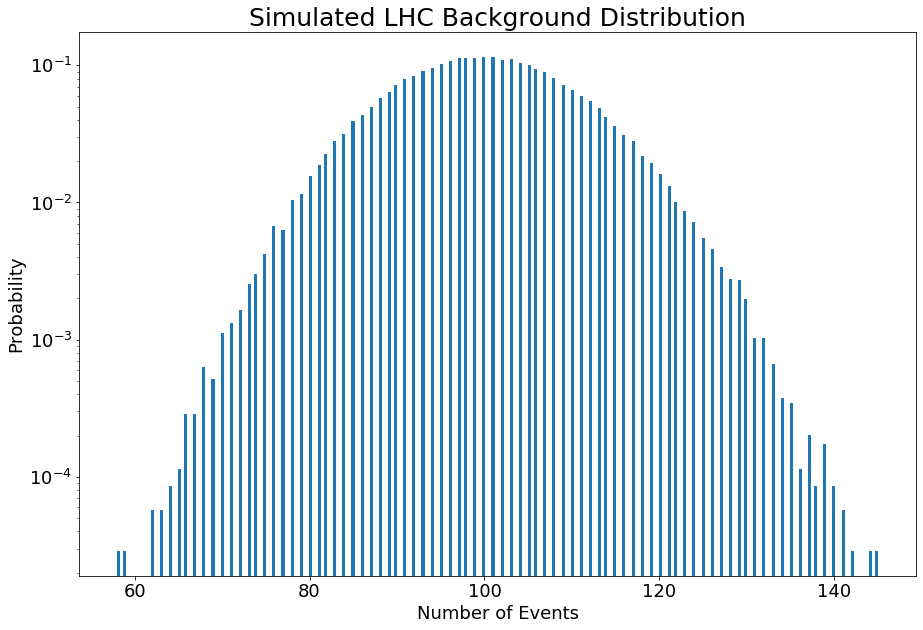

In [139]:
d = stats.poisson.rvs(100, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.hist(d, 250, density=True)
plt.tick_params(labelsize = 18)
plt.xlabel("Number of Events", size= 18)
plt.ylabel("Probability", size=18)
plt.title('Simulated LHC Background Distribution', size = 25)
plt.yscale('log')
plt.show()

In [140]:
prob= stats.norm.cdf(5)
sig = stats.poisson.ppf(prob, mu =100)
print("Signal strength: " + str(sig))

Signal strength: 154.0


Simulating data with roughly 100,000 point Poisson distribution results in a mean around 100 (number of events, here, it is the number of particles detected in the LHC). We determined the 5-sigma signal treshold to be 154.

### Problem 2

Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30𝜎 range. Inject this signal into your background data many times. Here, I chose the 8-sigma value.

In [141]:
prob= stats.norm.cdf(8)
sig = stats.poisson.ppf(prob, mu =100)
print("Signal strength: " + str(sig))

Signal strength: 190.0


Instead of determining the 5-sigma treshold we will determine the 8-sigma threshold. Here, we get a signal strength of 190 which will be injected into our background data of 100k. 

In [142]:
noise = np.random.normal(100,8,10000)
noisy_data = noise + 190

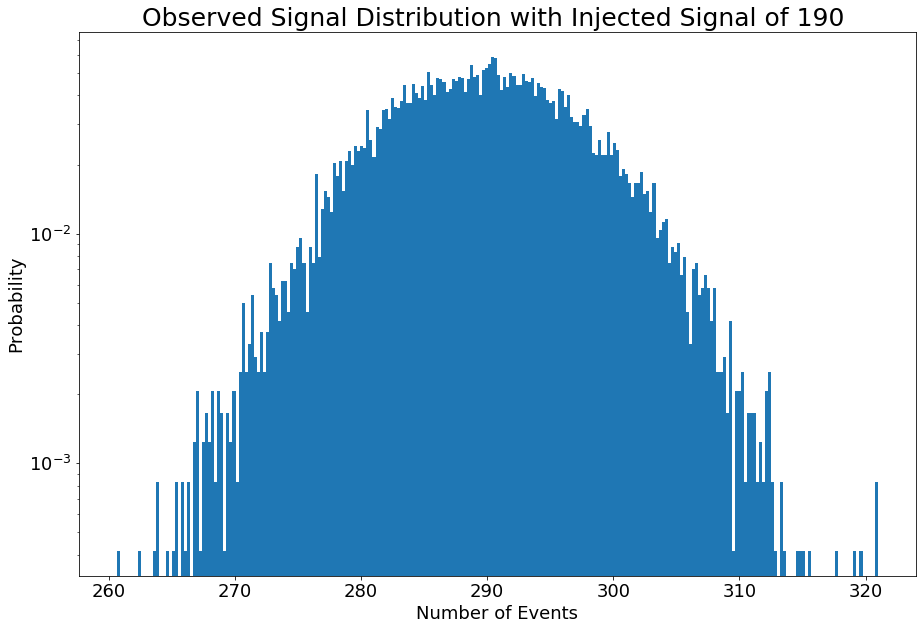

In [143]:
fig, ax = plt.subplots(1, 1)
ax.hist(noisy_data, 250, density=True)
plt.tick_params(labelsize = 18)
plt.xlabel("Number of Events", size= 18)
plt.ylabel("Probability", size=18)
plt.title('Observed Signal Distribution with Injected Signal of 190 ', size = 25)
plt.yscale('log')
plt.show()

Text(0.5, 1.0, 'Observed Signal Distribution with Injected Signal of 190 ')

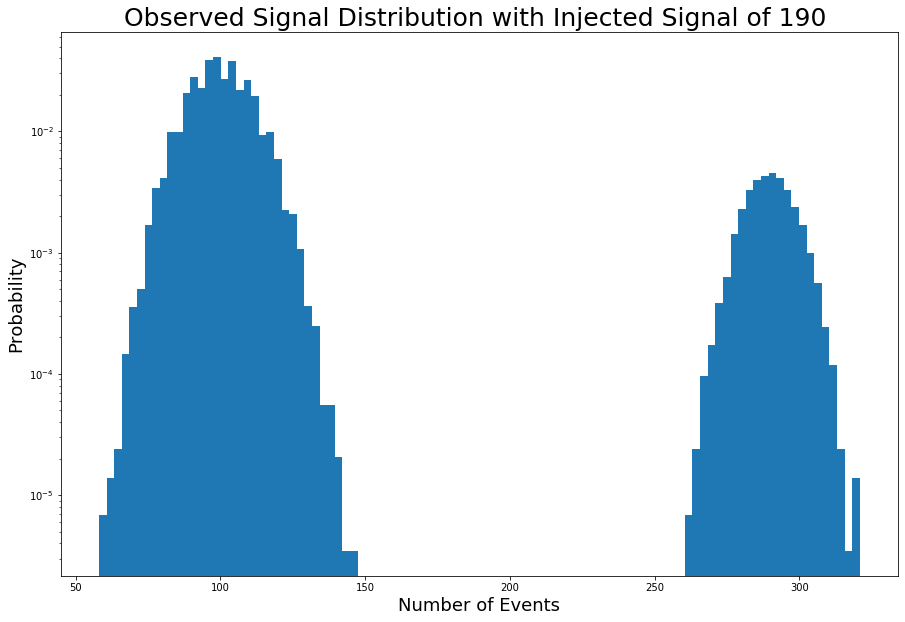

In [144]:
data = np.append(noisy_data,d)
fig, ax = plt.subplots(1,1)
ax.hist(data,density=True,bins=100)
ax.set_yscale('log')
plt.xlabel("Number of Events", size= 18)
plt.ylabel("Probability", size=18)
plt.title('Observed Signal Distribution with Injected Signal of 190 ', size = 25)

Observing the plots above, we can see that the mean of the observed signal is around 290 while the mean of the injected signal (190) is around 100. That said, the observed signal is not centered around the injected signals. The observed signal is somewhat symmetric, but the observed signal is stronger than the injected signal.

### Problem 3

Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5𝜎 (30𝜎 or more). 


Here, we will choose to a suite of injected signal strength from a large range of values from 0 to 30-sigma. From here, we will inject 1-million uniformly distributed signals into the data for which we will plot a 2D histogram. 

Text(0.5, 1.0, '2D Histogram of Injected Signal vs.Observed Data')

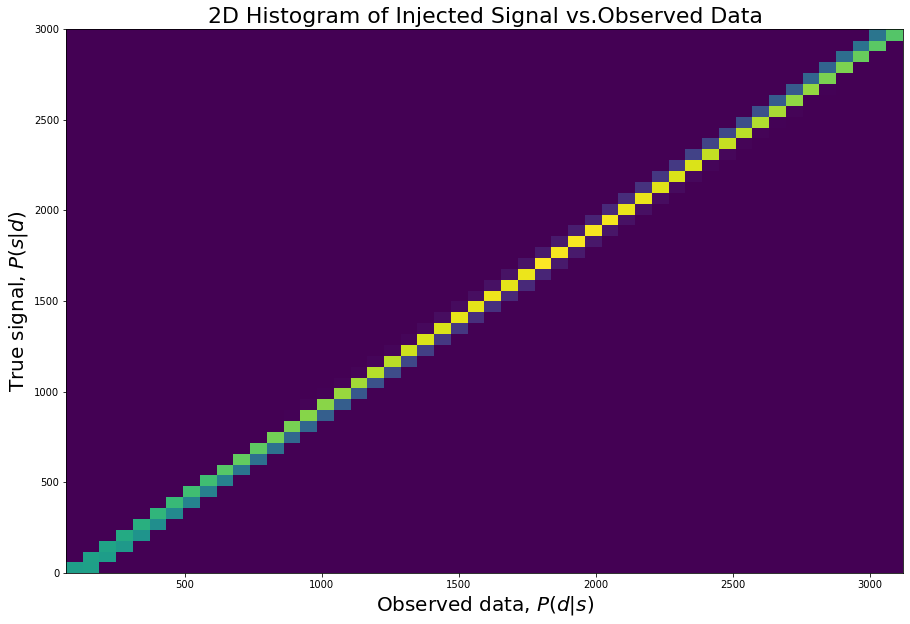

In [145]:
prob = stats.norm.cdf(0)
sig = stats.poisson.ppf(prob, mu=100)

sigma = np.linspace(0, 30*sig, 100000)
newSig = d + sigma

plt.hist2d(newSig, sigma, 50)
plt.ylabel('True signal, $P(s|d)$', fontsize = 20)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 20)
plt.title("2D Histogram of Injected Signal vs.Observed Data", size =22)

Observing the 2D histogram above, we can see that the observed signal strength increases linearly with the strength of the injected signal data. 

Text(0.5, 1.0, '1D Histogram of Injected Signal vs.Observed Data')

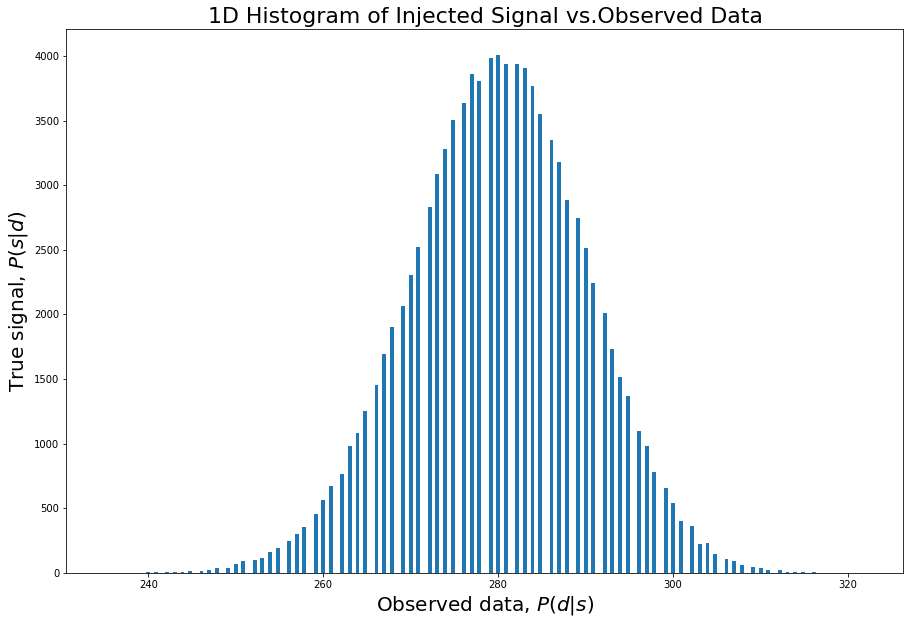

In [146]:
prob = stats.norm.cdf(8)
sig = stats.poisson.ppf(prob,loc=190, mu=100)

signal = np.ones(100000)*(sig)
inj_sig= signal-d

plt.hist(inj_sig, 200)
plt.ylabel('True signal, $P(s|d)$', fontsize = 20)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 20)
plt.title("1D Histogram of Injected Signal vs.Observed Data", size =22)

Observing the plot above we can see that the center is around 290 which is the same value we obtained in problem 2. 

What is the 1-sigma uncertainty on the truth signal strength? <br>

In [148]:
mean = np.mean(inj_sig)
print(mean)

prob = stats.norm.cdf(1)
sig_strength = stats.poisson.ppf(prob, mean)
print(sig_strength-mean)

up = stats.poisson.ppf(stats.norm.cdf(1),mean)
low = stats.poisson.ppf(stats.norm.sf(1),mean)
un=(up-low)/2
print(up,low,un)

280.00248
16.99752000000001
297.0 263.0 17.0


The 1-sigma uncertainity on truth signal of 290 is around 17. <br>
Because the difference between the upper and lower bound is not equal to 0, the histrogram is not quite symmentic. 